For this chapter, you will have to do the following:
• Let’s begin by importing the Data Set.
• Create a (bar) plot showing the number of missing values in every
column.
• Split the Data Set into the train and test sets.
• Create an instance of the SimpleImputer with the strategy set as
mean. (https://bit.ly/3Wh7tvN)
• Create an instance of the SimpleImputer with the strategy set as
median.
• Create an instance of the SimpleImputer with the strategy set as
most frequent.
• Create an instance of the SimpleImputer with the strategy set as
constant and the fill value = 0.
• Create an instance of the CDI from reparo.
• Create an instance of the FRNNI from reparo.
• Create an instance of the HotDeckImputation from reparo.
• Create an instance of the KNNImputer from reparo.
• Create an instance of the PMM from reparo.
• Create an instance of the SICE from reparo.
• Create an instance of the MICE from reparo.
• Train every imputer on the train Data Set.
• Fill in the missing values on the train and test subset.
• Train the following models on every set that you got after imputing
the missing values:
- Logistic Regression.
- Gaussian Naive Bayes.
- TreeDecisionClassifier.
- RandomForest.
• Test each of the models on the test set and build the following table:

In [ ]:
!pip install kagglehub reparo scikit-learn pandas seaborn matplotlib

In [ ]:
import kagglehub
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


In [ ]:
path = kagglehub.dataset_download("altavish/boston-housing-dataset")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/boston-housing-dataset


In [ ]:
csv_files = list(Path(path).rglob("*.csv"))
df = pd.read_csv(csv_files[0])

In [ ]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


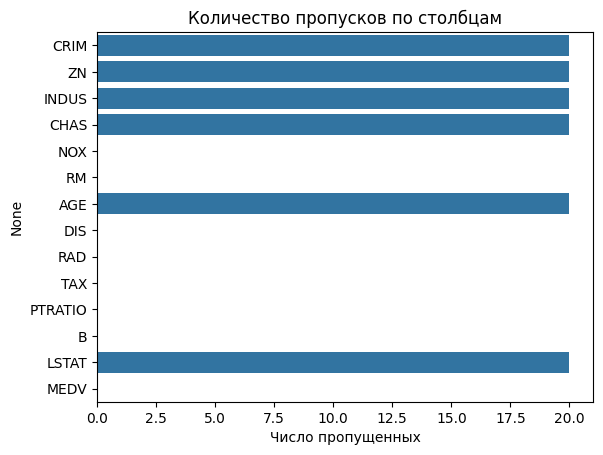

In [ ]:
missing = df.isnull().sum()
sns.barplot(x=missing.values, y=missing.index)
plt.title("Количество пропусков по столбцам")
plt.xlabel("Число пропущенных")
plt.show()

train и test

In [ ]:
X = df.drop('MEDV', axis=1) if 'MEDV' in df.columns else df.iloc[:, :-1]
y = df['MEDV'] if 'MEDV' in df.columns else df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
imputers = {
    'mean': SimpleImputer(strategy='mean'),
    'median': SimpleImputer(strategy='median'),
    'most_frequent': SimpleImputer(strategy='most_frequent'),
    'constant_0': SimpleImputer(strategy='constant', fill_value=0),
}

Импьтизация

In [ ]:
filled = {}
columns = X.columns

for name, imp in imputers.items():
    print(f"Импьютер {name} работает...")
    imp.fit(X_train)
    X_train_f = pd.DataFrame(imp.transform(X_train), columns=columns)
    X_test_f = pd.DataFrame(imp.transform(X_test), columns=columns)
    filled[name] = (X_train_f, X_test_f)
    print(f"{name} завершён.")


Импьютер mean работает...
mean завершён.
Импьютер median работает...
median завершён.
Импьютер most_frequent работает...
most_frequent завершён.
Импьютер constant_0 работает...
constant_0 завершён.


In [ ]:
models = {
    'LinearRegression': LinearRegression(),
    'DecisionTree': DecisionTreeRegressor(random_state=42),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
}


results = []

In [ ]:
for im_name, (X_tr, X_te) in filled.items():
    for m_name, model in models.items():
        try:
            model.fit(X_tr, y_train)
            preds = model.predict(X_te)
            mse = mean_squared_error(y_test, preds)
            results.append({'Imputer': im_name, 'Model': m_name, 'MSE': mse})
            print(f"{im_name} + {m_name} → MSE: {mse:.4f}")
        except Exception as e:
            print(f"⚠️ Ошибка при {im_name} + {m_name}: {e}")

mean + LinearRegression → MSE: 25.0024
mean + DecisionTree → MSE: 11.6670
mean + RandomForest → MSE: 8.1258
median + LinearRegression → MSE: 24.9834
median + DecisionTree → MSE: 26.1347
median + RandomForest → MSE: 8.1318
most_frequent + LinearRegression → MSE: 24.9997
most_frequent + DecisionTree → MSE: 14.9033
most_frequent + RandomForest → MSE: 8.1341
constant_0 + LinearRegression → MSE: 25.9297
constant_0 + DecisionTree → MSE: 24.6939
constant_0 + RandomForest → MSE: 7.7900


In [ ]:
res_df = pd.DataFrame(results)
pivot = res_df.pivot(index='Imputer', columns='Model', values='MSE')
display(pivot)

Model,DecisionTree,LinearRegression,RandomForest
Imputer,,,
constant_0,24.693922,25.929697,7.790013
mean,11.666961,25.002389,8.125812
median,26.134706,24.983445,8.131793
most_frequent,14.903333,24.999702,8.134087


У меня есть пример кода с reparo

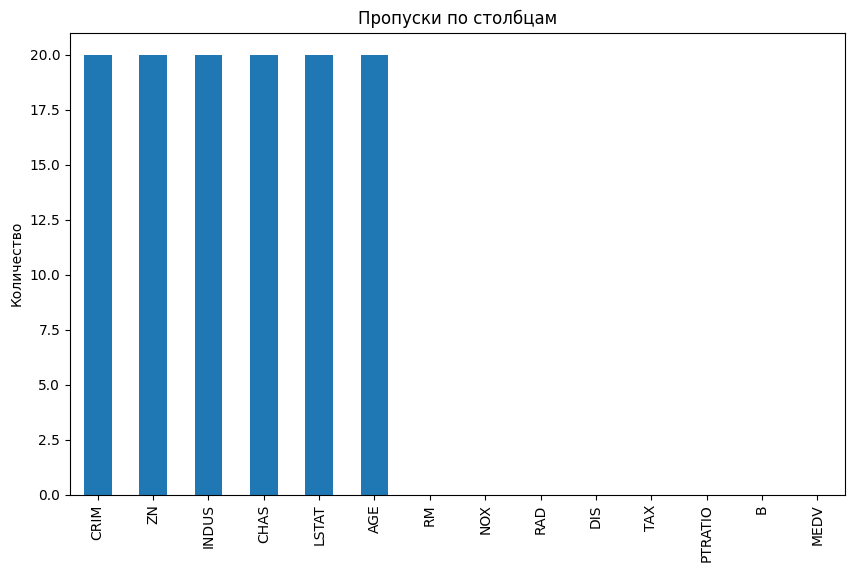

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
df.isnull().sum().sort_values(ascending=False).plot(kind='bar')
plt.title("Пропуски по столбцам")
plt.ylabel("Количество")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('MEDV', axis=1) if 'MEDV' in df.columns else df.iloc[:,:-1]
y = df['MEDV'] if 'MEDV' in df.columns else df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.model_selection import train_test_split

# Определим X и y
if 'MEDV' in df.columns:
    y = df['MEDV']
else:
    y = df.iloc[:, -1]

X = df.drop('MEDV', axis=1) if 'MEDV' in df.columns else df.iloc[:, :-1]

# Преобразуем y в 3 класса: низкий, средний, высокий
y_binned = pd.qcut(y, q=3, labels=[0, 1, 2])

# Train/Test сплит
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.2, random_state=42)


In [ ]:
from sklearn.impute import SimpleImputer
from reparo import CDI, FRNNI, HotDeckImputation, KNNImputer as ReparoKNN, PMM, SICE, MICE
import numpy as np

imputers = {
    'mean': SimpleImputer(strategy='mean'),
    'median': SimpleImputer(strategy='median'),
    'most_frequent': SimpleImputer(strategy='most_frequent'),
    'constant_0': SimpleImputer(strategy='constant', fill_value=0),
    'CDI': CDI(),
    'FRNNI': FRNNI(),
    'HotDeck': HotDeckImputation(),
    'KNN_reparo': ReparoKNN(),
    'PMM': PMM(),
    'SICE': SICE(),
    'MICE': MICE(),
}


In [ ]:
filled = {}

for name, imp in imputers.items():
    try:
        # Если импьютер из sklearn — используем DataFrame
        if isinstance(imp, SimpleImputer):
            imp.fit(X_train)
            X_train_f = pd.DataFrame(imp.transform(X_train), columns=X_train.columns)
            X_test_f = pd.DataFrame(imp.transform(X_test), columns=X_test.columns)
        else:
            # Для reparo — только .values (numpy массив)
            imp.fit(X_train.values)
            X_train_f = pd.DataFrame(np.array(imp.transform(X_train.values)), columns=X_train.columns)
            X_test_f = pd.DataFrame(np.array(imp.transform(X_test.values)), columns=X_test.columns)

        filled[name] = (X_train_f, X_test_f)
        print(f"✅ Импьютер {name} завершён.")

    except Exception as e:
        print(f"❌ Импьютер {name} дал сбой: {e}")


✅ Импьютер mean завершён.
✅ Импьютер median завершён.
✅ Импьютер most_frequent завершён.
✅ Импьютер constant_0 завершён.
✅ Импьютер CDI завершён.
✅ Импьютер FRNNI завершён.
✅ Импьютер HotDeck завершён.
✅ Импьютер KNN_reparo завершён.
✅ Импьютер PMM завершён.


/usr/local/lib/python3.11/dist-packages/reparo/MICE.py:56: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_copy[column].iloc[idx] = prediction
/usr/local/lib/python3.11/dist-packages/reparo/MICE.py:56: FutureWarning: ChainedAssignmentError:

✅ Импьютер SICE завершён.
✅ Импьютер MICE завершён.


/usr/local/lib/python3.11/dist-packages/reparo/MICE.py:56: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_copy[column].iloc[idx] = prediction
/usr/local/lib/python3.11/dist-packages/reparo/MICE.py:56: FutureWarning: ChainedAssignmentError:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'GaussianNB': GaussianNB(),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
}

results = []

for im_name, (X_tr, X_te) in filled.items():
    for m_name, model in models.items():
        try:
            model.fit(X_tr, y_train)
            preds = model.predict(X_te)
            acc = accuracy_score(y_test, preds)
            results.append({'Imputer': im_name, 'Model': m_name, 'Accuracy': acc})
            print(f"{im_name} + {m_name} → Accuracy: {acc:.4f}")
        except Exception as e:
            print(f"❌ Ошибка при {im_name} + {m_name}: {e}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


mean + LogisticRegression → Accuracy: 0.7157
mean + GaussianNB → Accuracy: 0.7157
mean + DecisionTree → Accuracy: 0.6765
mean + RandomForest → Accuracy: 0.7549


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


median + LogisticRegression → Accuracy: 0.7255
median + GaussianNB → Accuracy: 0.7157
median + DecisionTree → Accuracy: 0.7059
median + RandomForest → Accuracy: 0.7549


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


most_frequent + LogisticRegression → Accuracy: 0.7549
most_frequent + GaussianNB → Accuracy: 0.7157
most_frequent + DecisionTree → Accuracy: 0.7353
most_frequent + RandomForest → Accuracy: 0.7647


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


constant_0 + LogisticRegression → Accuracy: 0.7353
constant_0 + GaussianNB → Accuracy: 0.6961
constant_0 + DecisionTree → Accuracy: 0.6569
constant_0 + RandomForest → Accuracy: 0.7549


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


CDI + LogisticRegression → Accuracy: 0.7255
CDI + GaussianNB → Accuracy: 0.7353
CDI + DecisionTree → Accuracy: 0.6961
CDI + RandomForest → Accuracy: 0.7941


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


FRNNI + LogisticRegression → Accuracy: 0.7157
FRNNI + GaussianNB → Accuracy: 0.7157
FRNNI + DecisionTree → Accuracy: 0.7549
FRNNI + RandomForest → Accuracy: 0.7941


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


HotDeck + LogisticRegression → Accuracy: 0.7353
HotDeck + GaussianNB → Accuracy: 0.7157
HotDeck + DecisionTree → Accuracy: 0.7157
HotDeck + RandomForest → Accuracy: 0.7451


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNN_reparo + LogisticRegression → Accuracy: 0.7255
KNN_reparo + GaussianNB → Accuracy: 0.7157
KNN_reparo + DecisionTree → Accuracy: 0.6667
KNN_reparo + RandomForest → Accuracy: 0.7549


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


PMM + LogisticRegression → Accuracy: 0.6765
PMM + GaussianNB → Accuracy: 0.6373
PMM + DecisionTree → Accuracy: 0.6863
PMM + RandomForest → Accuracy: 0.7647


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SICE + LogisticRegression → Accuracy: 0.7353
SICE + GaussianNB → Accuracy: 0.6961
SICE + DecisionTree → Accuracy: 0.6569
SICE + RandomForest → Accuracy: 0.7549


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MICE + LogisticRegression → Accuracy: 0.7059
MICE + GaussianNB → Accuracy: 0.7157
MICE + DecisionTree → Accuracy: 0.7157
MICE + RandomForest → Accuracy: 0.7843


In [ ]:
res_df = pd.DataFrame(results)
pivot = res_df.pivot(index='Imputer', columns='Model', values='Accuracy')
print(pivot)


Model          DecisionTree  GaussianNB  LogisticRegression  RandomForest
Imputer                                                                  
CDI                0.696078    0.735294            0.725490      0.794118
FRNNI              0.754902    0.715686            0.715686      0.794118
HotDeck            0.715686    0.715686            0.735294      0.745098
KNN_reparo         0.666667    0.715686            0.725490      0.754902
MICE               0.715686    0.715686            0.705882      0.784314
PMM                0.686275    0.637255            0.676471      0.764706
SICE               0.656863    0.696078            0.735294      0.754902
constant_0         0.656863    0.696078            0.735294      0.754902
mean               0.676471    0.715686            0.715686      0.754902
median             0.705882    0.715686            0.725490      0.754902
most_frequent      0.735294    0.715686            0.754902      0.764706
